# ****Задача предсказания сосудисто-сердечных заболеваний****

Цель проекта:  
&nbsp; 1. Изучить и написать краткое содержание научной статьи.  
&nbsp; 2. Проанализировать данные.  
&nbsp; 3. Провести корреляционный анализ.  
&nbsp; 4. Обучить следующие модели и сравнить результаты:  
&emsp; Logistic Regression;  
&emsp; RandomForest;  
&emsp; Neural Network.  
Описание датасета:  
&emsp;Age (возраст);  
&emsp;Sex (пол);  
&emsp;Resting_blood_pressure (артериальное давление в состоянии покоя);  
&emsp;Serum_cholestoral (уровень холестерина в крови mg/dl);  
&emsp;Fasting_blood_sugar (анализ глюкозы в крови натощак (> 120 mg/dl));  
&emsp;Maximum_heart_rate_achieved (максимальная частота сердечных сокращений);  
&emsp;Exercise_induced_angina (стенокардия при нагрузке),  
&emsp;Oldpeak (депрессия ST-сегмента);  
&emsp;Slope (наклон пикового сегмента ST при физической нагрузке);  
&emsp;Number_of_major_vessels (количество крупных сосудов (0-3), окрашенных с помощью флюороскопии);  
&emsp;Resting_electrocardiographic_results (результаты электрокардиографических исследований в покое 0, 1, 2);  
&emsp;Thal (3 = норма; 6 = фиксированный дефект; 7 = обратимый дефект);  
&emsp;Chest_bin (боль в груди от 1 до 4).  

In [2]:
import torch
import torch.nn as nn


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




#Preprocessing
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV

#METRICS
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score, ConfusionMatrixDisplay


#MODELS
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from warnings import filterwarnings
from torch.utils.data import DataLoader,Subset
import torch.nn as nn
import torch.optim as optim

In [51]:
# чтение данных
df_test = pd.read_csv('test.csv')
df_train =  pd.read_csv('train.csv')

# 1. Анализ данных

In [52]:
#Удаление дубликатов
df_train = df_train.drop_duplicates()
df_test= df_test.drop_duplicates()

In [53]:
df_test.drop('ID', axis = 1, inplace = True)
df_train.drop('ID', axis = 1, inplace = True)

In [54]:
print(df_test.shape)
df_train.shape

(400000, 13)


(600000, 14)

In [7]:
#пропуски в данных
print(df_train.isna().sum())
df_test.isna().sum()

age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64


age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
dtype: int64

In [8]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,400000.0,54.406917,9.101044,27.496874,48.021226,55.130138,60.667833,80.751628
sex,400000.0,0.676858,0.467677,0.000000,0.000000,1.000000,1.000000,1.000000
chest,400000.0,3.169252,0.950585,-0.337469,3.000000,3.000000,4.000000,4.000000
resting_blood_pressure,400000.0,131.369647,17.862279,85.830892,119.942167,129.735888,139.935499,212.300808
serum_cholestoral,400000.0,249.593475,51.720531,94.958220,216.455450,244.273212,274.357993,527.712687
fasting_blood_sugar,400000.0,0.151163,0.358208,0.000000,0.000000,0.000000,0.000000,1.000000
resting_electrocardiographic_results,400000.0,1.025295,0.994132,0.000000,0.000000,2.000000,2.000000,2.000000
maximum_heart_rate_achieved,400000.0,149.659088,23.065911,58.964662,135.818008,153.337116,165.216643,207.412021
exercise_induced_angina,400000.0,0.333085,0.471317,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,400000.0,1.050086,1.140986,-0.601414,0.000000,0.816276,1.671519,6.856219


In [9]:
# Анализ уникальных значений, возможно есть опечатки в данных 
for i, column in enumerate(df_test.columns, start=1):
    unique_values = df_test[column].unique()
    print(f"{i}. {column}': {unique_values}")

1. age': [53.963191 49.621479 36.933893 ... 55.530874 55.442225 60.638052]
2. sex': [1 0]
3. chest': [4.       1.300924 3.       ... 1.506009 1.391824 2.053896]
4. resting_blood_pressure': [136.940829 122.024651 127.585643 ... 106.656515 118.354111 153.045956]
5. serum_cholestoral': [236.862814 226.593019 351.061046 ... 210.870682 280.867061 184.329205]
6. fasting_blood_sugar': [0 1]
7. resting_electrocardiographic_results': [2 0 1]
8. maximum_heart_rate_achieved': [143.961525 112.220874 177.945922 ... 152.268989 159.820939 139.657995]
9. exercise_induced_angina': [1 0]
10. oldpeak': [0.7111   0.       0.313078 ... 3.6324   1.719441 3.341322]
11. slope': [1 2 3]
12. number_of_major_vessels': [2 1 0 3]
13. thal': [7 3 6]


In [47]:
# Выделим  категориальные и вещественные признаки 
numeric_columns = ['age','chest','resting_blood_pressure','serum_cholestoral','maximum_heart_rate_achieved','oldpeak']
categorical_columns = ['sex','fasting_blood_sugar','resting_electrocardiographic_results','exercise_induced_angina','slope',
                       'number_of_major_vessels','thal']

In [11]:
# функция для построения распределения числовых колонок
def plot_distributions(df, numeric_columns):
    for col in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Распределение {col}')
        plt.xlabel(col)
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

In [12]:
# Функция для построения графиков  для категориальных колонок
def plot_categorical_columns(df, categorical_columns):
    sns.set_palette('Blues', 8)
    
    # Определяем количество колонок
    num_cols = len(categorical_columns)
    
    # Определяем количество строк и столбцов для подграфиков
    nrows = (num_cols + 2) // 3  # 3 колонки в строке
    plt.figure(figsize=(13, 5 * nrows))

    for i, col in enumerate(categorical_columns):
        plt.subplot(nrows, 3, i + 1)
        
        # Проверка на наличие данных в колонке
        if df[col].nunique() > 0:
            plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%.0f%%')
            plt.title(col)
        else:
            plt.text(0.5, 0.5, 'Нет данных', horizontalalignment='center', verticalalignment='center', fontsize=12)

    plt.tight_layout()  # Убираем наложение подграфиков
    plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


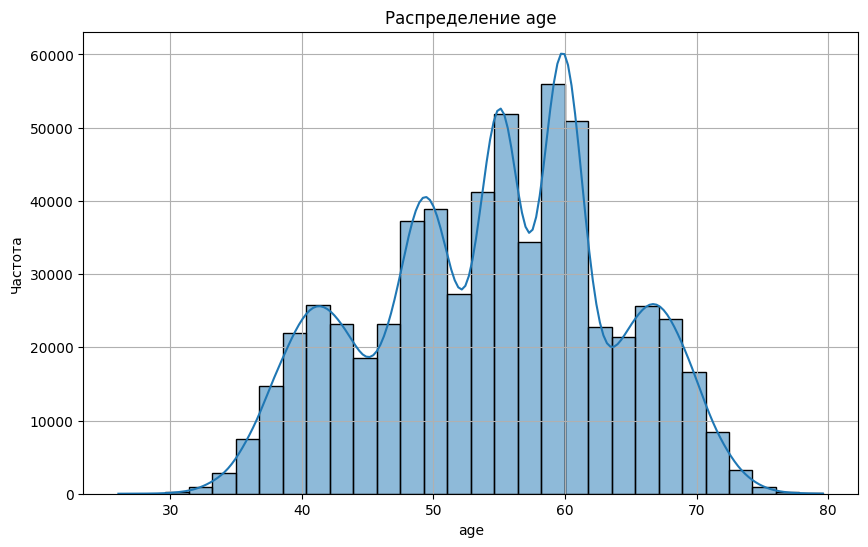

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


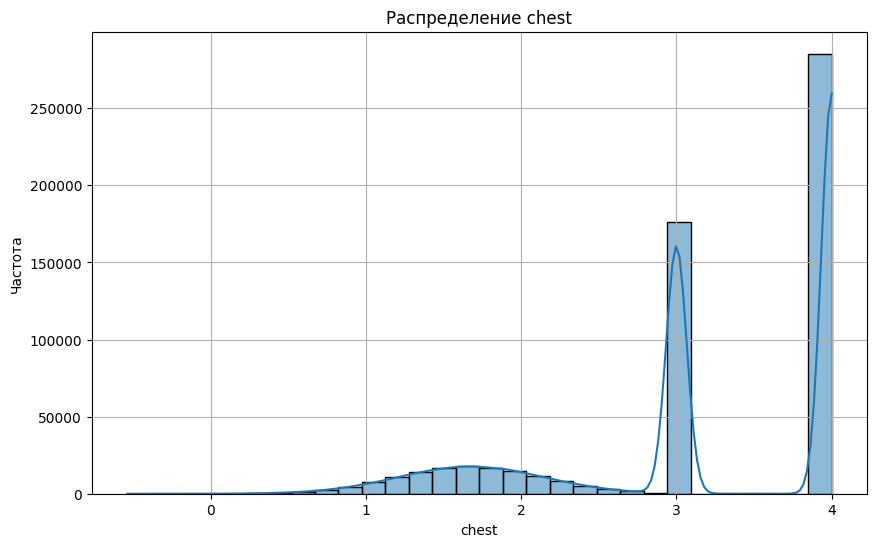

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


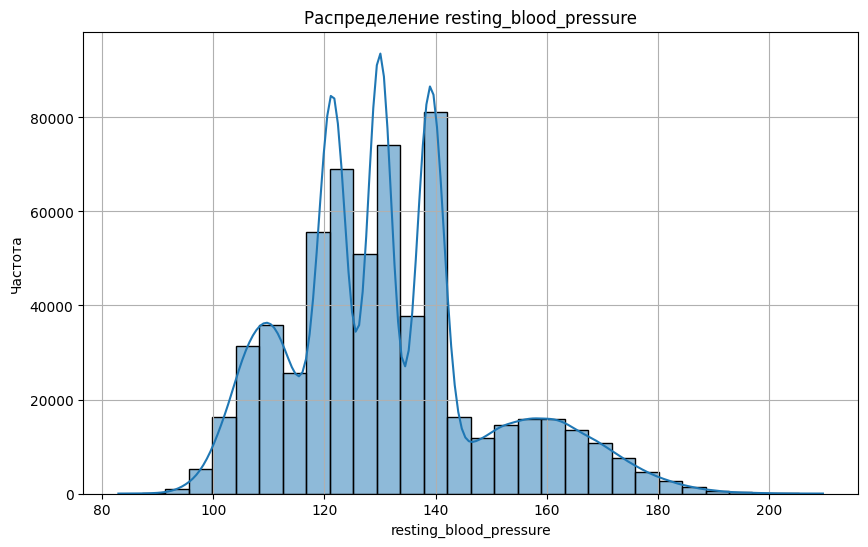

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


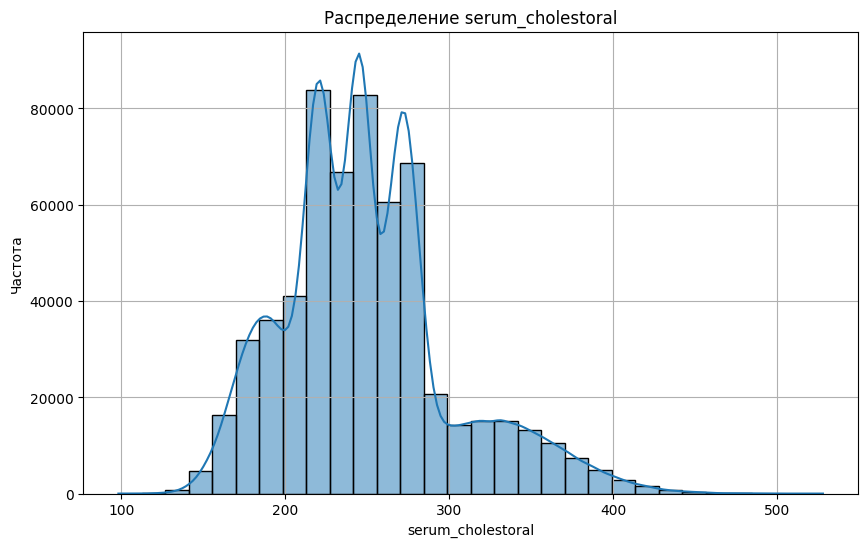

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


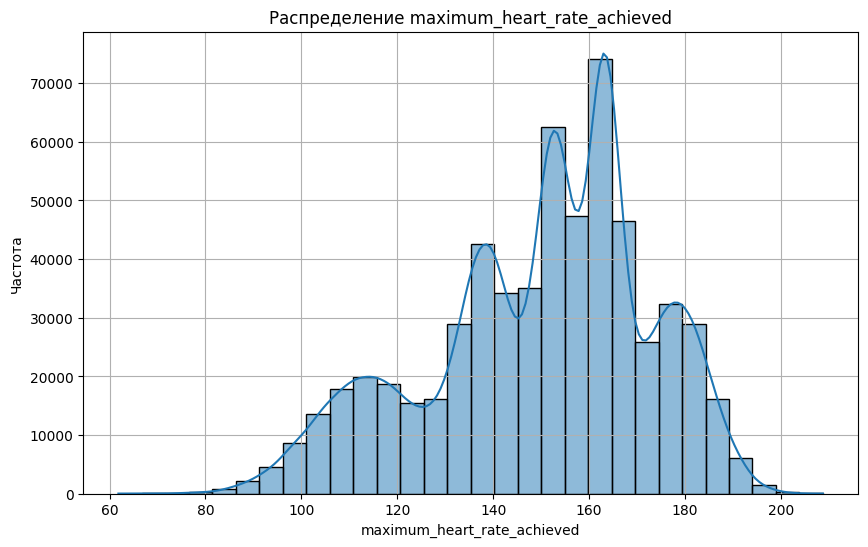

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


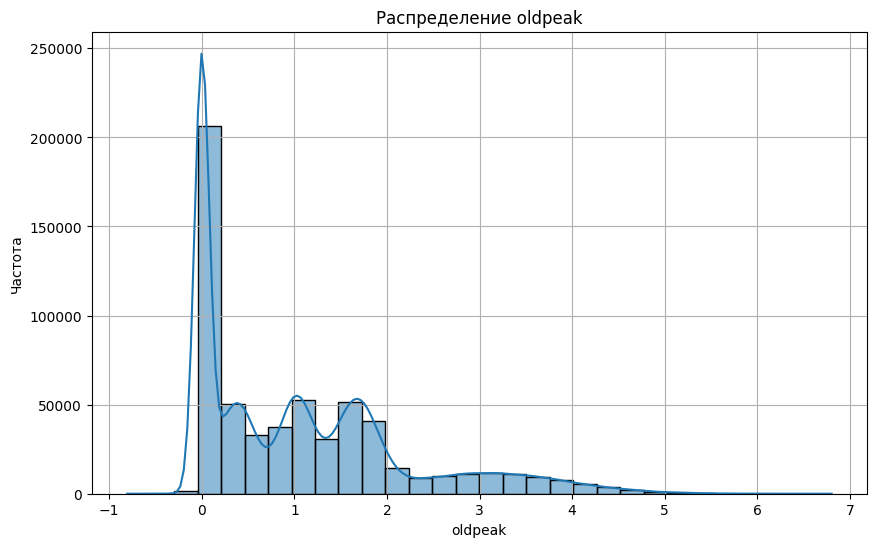

In [13]:
plot_distributions(df_train, numeric_columns)

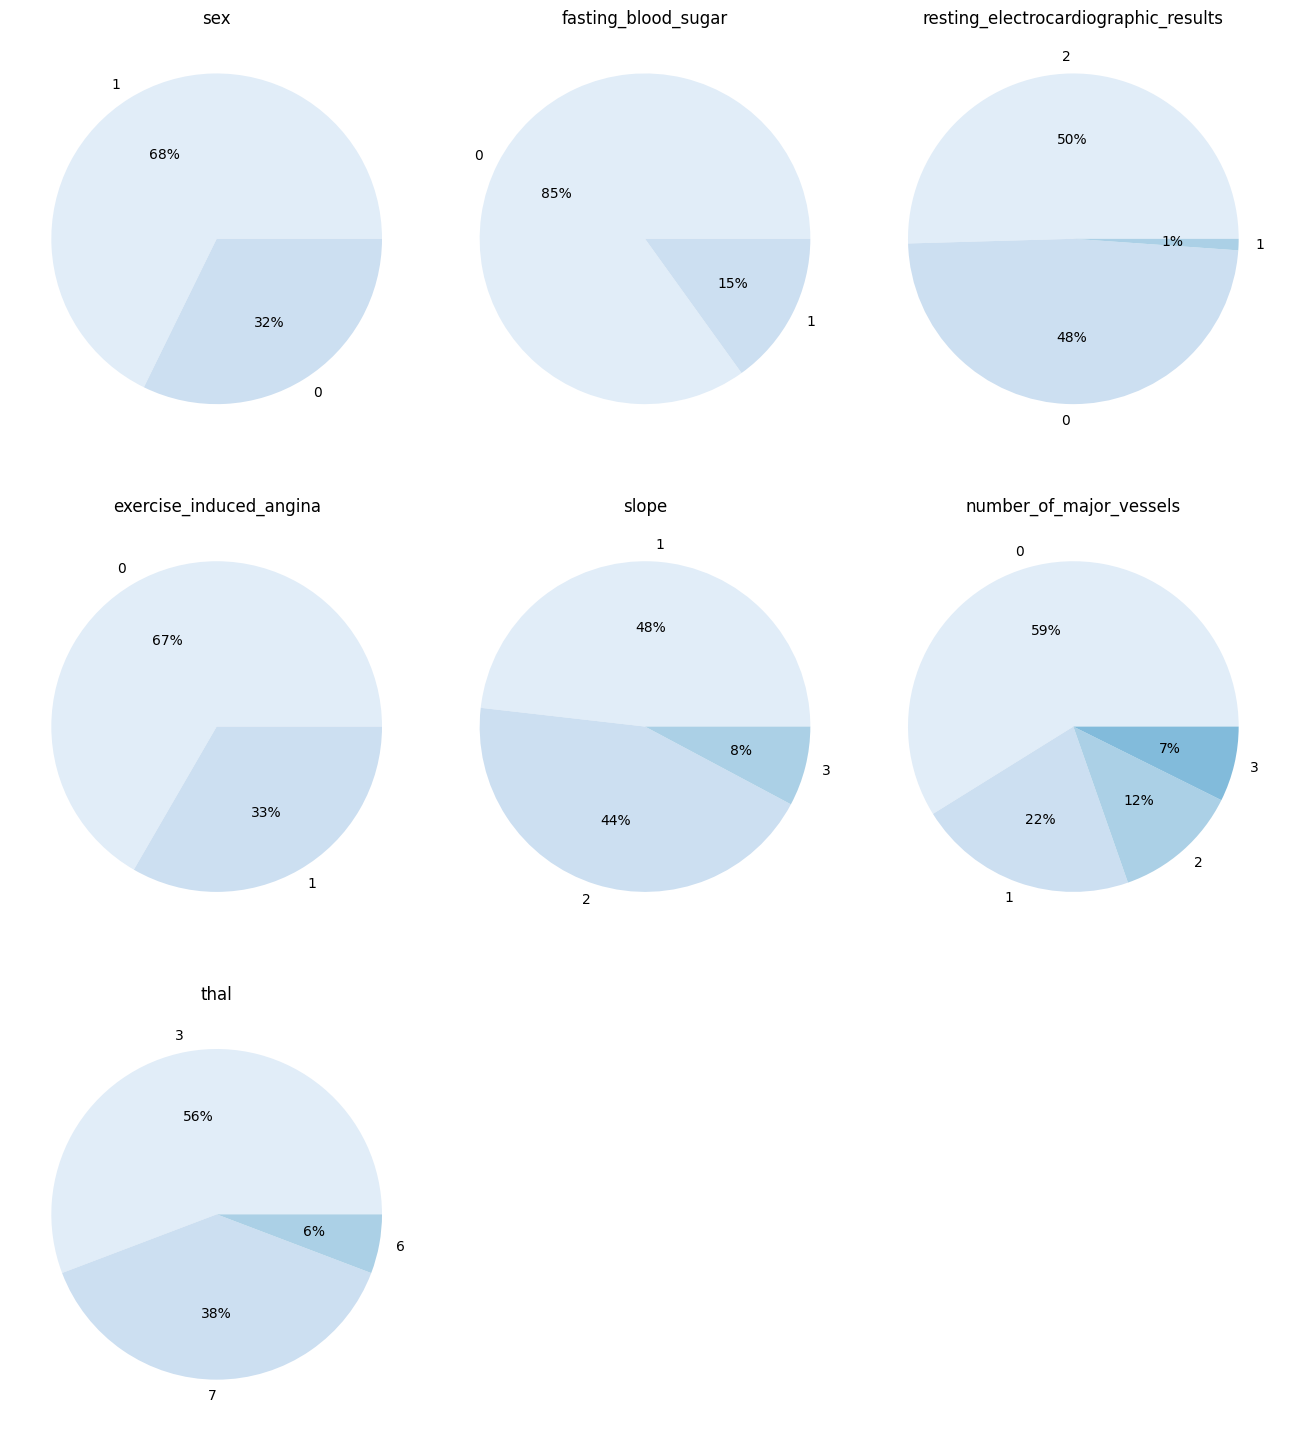

In [14]:
plot_categorical_columns(df_train, categorical_columns)

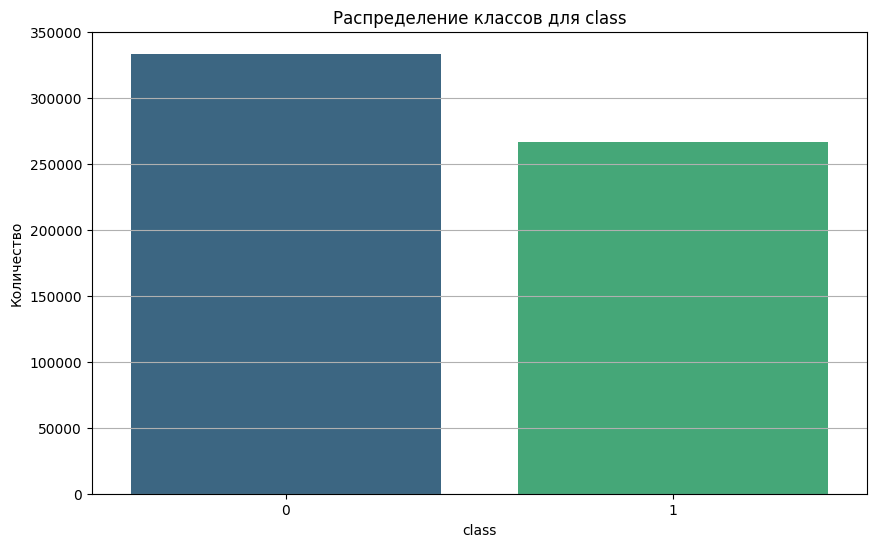

In [15]:
# Анализ дисбаланса
plt.figure(figsize=(10, 6))

sns.countplot(data=df_train, x='class', palette='viridis')

plt.title(f'Распределение классов для class')
plt.xlabel('class')
plt.ylabel('Количество')
plt.grid(axis='y')
plt.xticks() 
plt.show()


## Выводы:  
1. Пропусков в данных и дубликатов нет
2. Распределение данных не является нормальным, поэтому для дальнейшего анализа используем коэффициент корреляции Спирмена
3. Есть небольшой дисбаланс(отношение 4 к 5), его можно рассматривать как несущественный, и, вероятно, это не приведет к значительным проблемам при обучении моделей машинного обучения

## 1.1 Корреляционный анализ

### 1.1.1 Диаграммы рассеяния

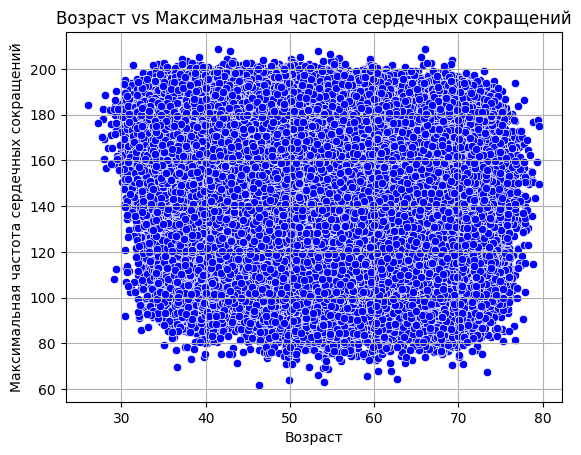

In [16]:
#влияние возраста на максимальную частоту сердечных сокращений
sns.scatterplot(data=df_train, x='age', y='maximum_heart_rate_achieved', color='blue')
plt.title('Возраст vs Максимальная частота сердечных сокращений')
plt.xlabel('Возраст')
plt.ylabel('Максимальная частота сердечных сокращений')
plt.grid(True)
plt.show()

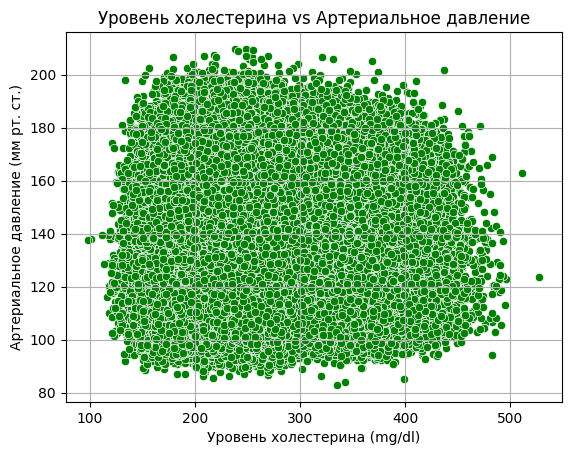

In [17]:
sns.scatterplot(data=df_train, x='serum_cholestoral', y='resting_blood_pressure', color='green')
plt.title('Уровень холестерина vs Артериальное давление')
plt.xlabel('Уровень холестерина (mg/dl)')
plt.ylabel('Артериальное давление (мм рт. ст.)')
plt.grid(True)
plt.show()

### 1.1.2 Heatmap корреляционной матрицы

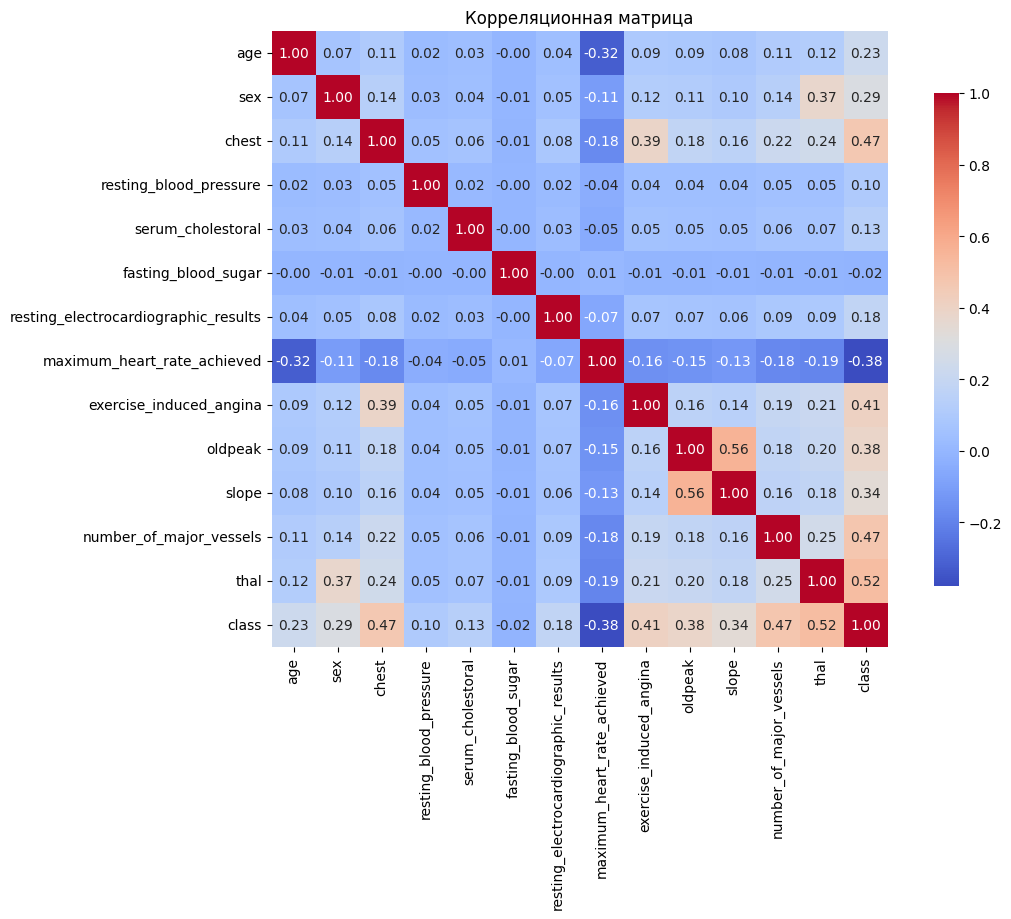

In [18]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_train.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})    
plt.title('Корреляционная матрица')
plt.show()

## 1.2 Выбросы

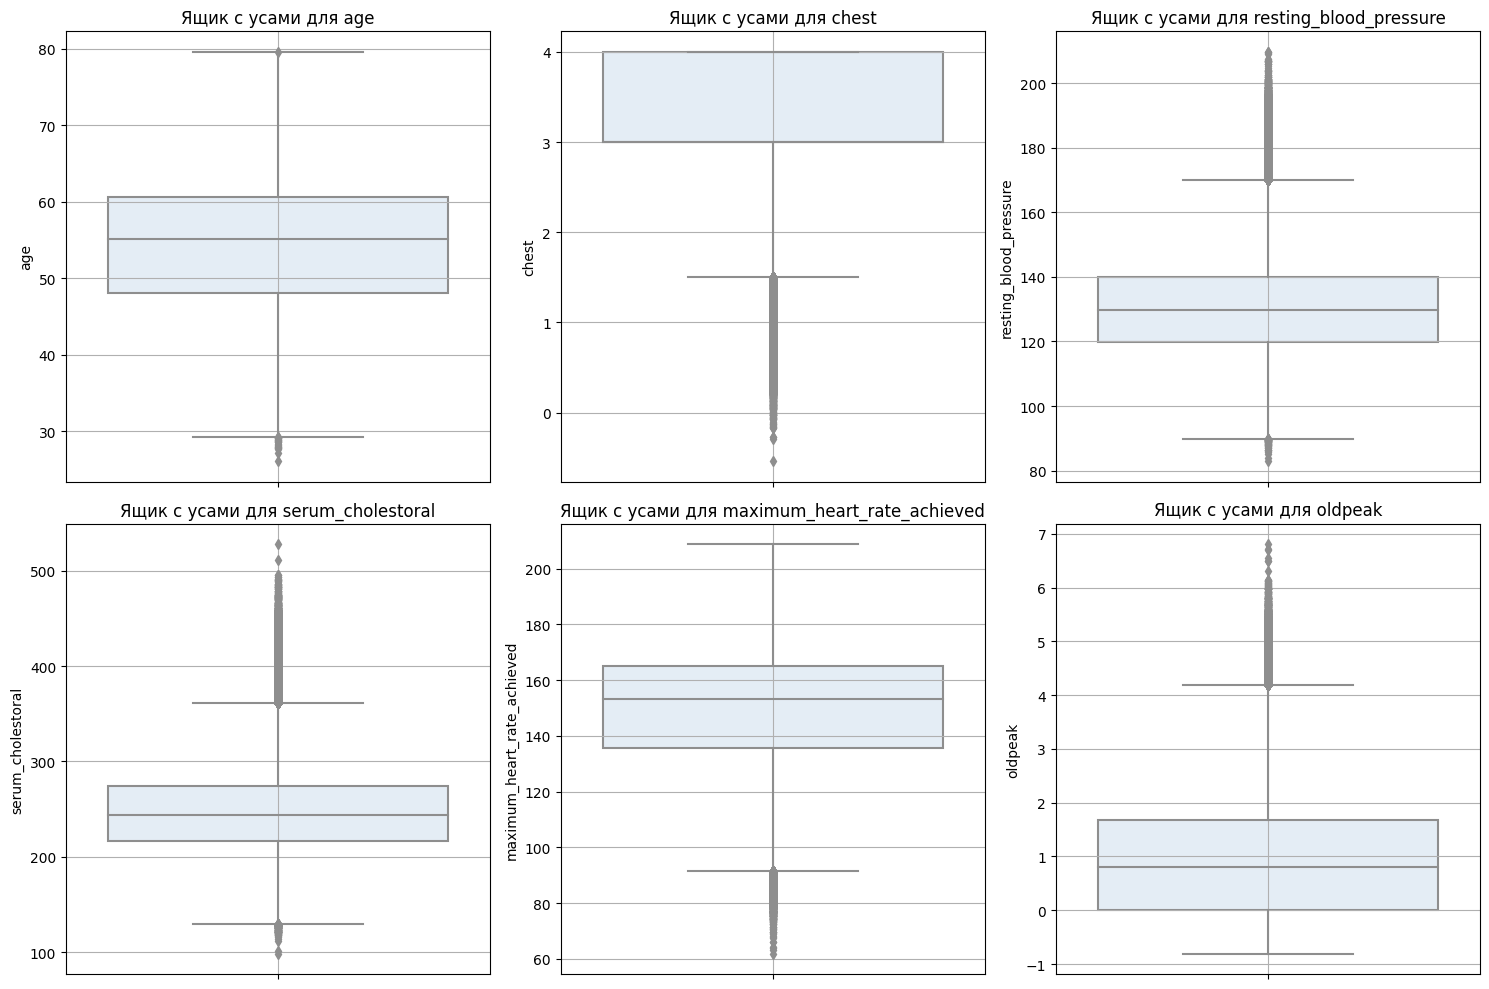

In [19]:
# Построение ящиков с усами для каждой количественной переменной
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)  # Создаем подграфики
    sns.boxplot(data=df_train, y=col)
    plt.title(f'Ящик с усами для {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

## Выводы:  
1. На диаграммах рассеивания видны выбросы
2. По корреляционной матрице невидно явных взаимосвязей между признаками
3. Ящики с усами показывают, что есть большое количество выбросов по каждой количественной переменной, есть необходимость использовать методы регуляризации и использовать более устойчивые функции потерь(MAE или Huber loss) + используем стандартизацию данных

# 1.2 Предобработка данных

In [20]:
def get_X_train_y_train(df_train):
    X = df_train.drop('class', axis=1)
    y = df_train['class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test 

# 2. Обучение LogisticRegression

In [21]:
def get_preprocessor(numeric_columns, categorical_columns):
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(drop='first')


    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_columns),
            ('cat', categorical_transformer, categorical_columns)
        ])
    return preprocessor

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_confusion_matrix(y_test, y_pred, df):

    cm = confusion_matrix(y_test, y_pred)
    
    unique_classes = df['class'].unique()
    if len(unique_classes) != cm.shape[0]:
        print("Количество классов в df не совпадает с количеством классов в матрице ошибок.")
        return
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
    disp.plot(cmap='Blues', values_format='d')  
    plt.title('Матрица ошибок')
    plt.show()


In [23]:
def get_pipeline(preprocessor, model):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ],verbose = True)
    return pipeline

In [24]:
def fit_model(param_grid, pipeline,X_train, X_test, y_train, y_test ):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy',return_train_score=True)

    # Обучение модели
    grid_search.fit(X_train, y_train)

    # Вывод лучших параметров и точности
    print("Лучшие параметры:", grid_search.best_params_)
    print("Лучшая точность на валидации:", grid_search.best_score_)

    # Оценка на тестовой выборке
    test_accuracy = grid_search.score(X_test, y_test)
    print("Точность на тестовой выборке:", test_accuracy)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    return best_model, y_pred


In [25]:
def fit_logisticRegression(df_train):
    param_grid = {
        'classifier__C': [0.01, 0.1, 1, 10, 100],  # Гиперпараметр для LogisticRegression
        'classifier__penalty': ['l1', 'l2','elasticnet']  # Другие гиперпараметры
    }
    X_train, X_test, y_train, y_test  = get_X_train_y_train(df_train)
    preprocessor = get_preprocessor(numeric_columns, categorical_columns)
    pipeline = get_pipeline(preprocessor, LogisticRegression())
    model, y_pred = fit_model(param_grid, pipeline,X_train, X_test, y_train, y_test)
    get_confusion_matrix(y_test, y_pred, df_train )
    return model

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.5s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.7s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.4s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.5s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.7s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipel

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.8s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.1s
Лучшие параметры: {'classifier__C': 10, 'classifier__penalty': 'l2'}
Лучшая точность на валидации: 0.8851104166666666
Точность на тестовой выборке: 0.884


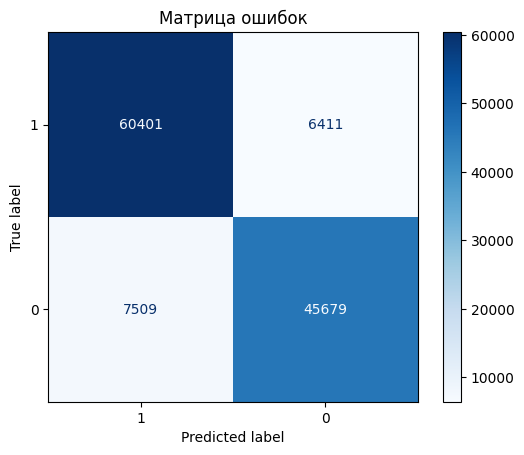

In [26]:
logisticRegression_model = fit_logisticRegression(df_train)

# 3. Обучение RandomForest

In [27]:
def fit_randomForestClassifier(df_train):

    param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [10]

    }
    X_train, X_test, y_train, y_test  = get_X_train_y_train(df_train)
    preprocessor = get_preprocessor(numeric_columns, categorical_columns)
    pipeline = get_pipeline(preprocessor, RandomForestClassifier() )
    model, y_pred = fit_model(param_grid, pipeline, X_train, X_test, y_train, y_test)
    get_confusion_matrix(y_test, y_pred, df_train)
    return model

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  28.3s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  27.6s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  28.2s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  30.6s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  30.8s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  56.2s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  55.4s
[Pipel

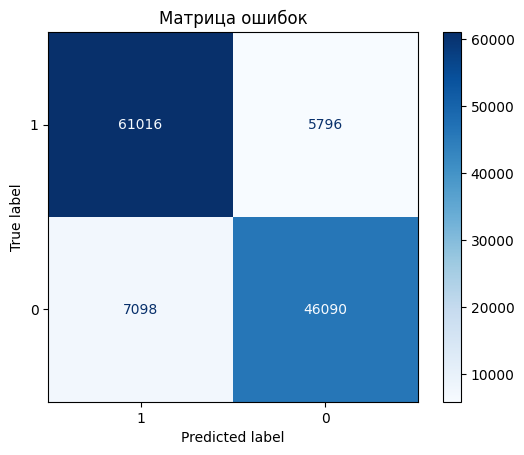

In [28]:
randomForestClassifier_model =  fit_randomForestClassifier(df_train)

# 4. Обучение Neural Network

In [29]:
def fit_NeuralNetwork(df_train):
    scaler = StandardScaler()

    data_encoded = pd.get_dummies(df_train, columns = categorical_columns, drop_first=True)



    X = data_encoded.drop('class', axis=1)
    y = data_encoded['class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)



    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)  


    class SimpleNN(nn.Module):
        def __init__(self):
            super(SimpleNN, self).__init__()
            self.fc1 = nn.Linear(X_train.shape[1], 128)  
            self.dropout1 = nn.Dropout(0.3)
            self.fc2 = nn.Linear(128, 64)
            self.dropout2 = nn.Dropout(0.3)
            self.fc3 = nn.Linear(64, 32)
            self.dropout3 = nn.Dropout(0.3)
            self.fc4 = nn.Linear(32, 1)

        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = self.dropout1(x)
            x = torch.relu(self.fc2(x))
            x = self.dropout2(x)
            x = torch.relu(self.fc3(x))
            x = self.dropout3(x)
            x = torch.sigmoid(self.fc4(x))
            return x

    model = SimpleNN()
    criterion = nn.BCEWithLogitsLoss()  
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    test_losses = []
    accuracies = []


    num_epochs = 1000
    for epoch in range(num_epochs):
        model.train()  
        optimizer.zero_grad()  
        outputs = model(X_train_tensor)  
        loss = criterion(outputs, y_train_tensor)  
        loss.backward() 
        optimizer.step()  

 
        train_losses.append(loss.item())

    
        model.eval()  
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)  
            test_losses.append(test_loss.item())

            predicted = torch.sigmoid(test_outputs) 
            predicted_classes = (predicted > 0.5).float()  
            accuracy = (predicted_classes.view(-1) == y_test_tensor.view(-1)).sum().item() / y_test_tensor.size(0)
            accuracies.append(accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, Accuracy: {accuracy:.4f}')

   
    plt.figure(figsize=(12, 5))


    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title('Loss during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label='Test Accuracy')
    plt.title('Test Accuracy during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()

    plt.tight_layout()
    plt.show()

Epoch [10/1000], Loss: 0.7342, Test Loss: 0.7318, Accuracy: 0.4432
Epoch [20/1000], Loss: 0.6917, Test Loss: 0.6846, Accuracy: 0.4432
Epoch [30/1000], Loss: 0.6482, Test Loss: 0.6403, Accuracy: 0.4432
Epoch [40/1000], Loss: 0.6221, Test Loss: 0.6167, Accuracy: 0.4432
Epoch [50/1000], Loss: 0.6055, Test Loss: 0.6005, Accuracy: 0.4439
Epoch [60/1000], Loss: 0.5928, Test Loss: 0.5880, Accuracy: 0.4693
Epoch [70/1000], Loss: 0.5860, Test Loss: 0.5819, Accuracy: 0.5273
Epoch [80/1000], Loss: 0.5830, Test Loss: 0.5797, Accuracy: 0.5979
Epoch [90/1000], Loss: 0.5813, Test Loss: 0.5789, Accuracy: 0.6446
Epoch [100/1000], Loss: 0.5805, Test Loss: 0.5784, Accuracy: 0.6770
Epoch [110/1000], Loss: 0.5799, Test Loss: 0.5781, Accuracy: 0.6985
Epoch [120/1000], Loss: 0.5795, Test Loss: 0.5779, Accuracy: 0.7123
Epoch [130/1000], Loss: 0.5791, Test Loss: 0.5777, Accuracy: 0.7242
Epoch [140/1000], Loss: 0.5787, Test Loss: 0.5776, Accuracy: 0.7316
Epoch [150/1000], Loss: 0.5784, Test Loss: 0.5774, Accura

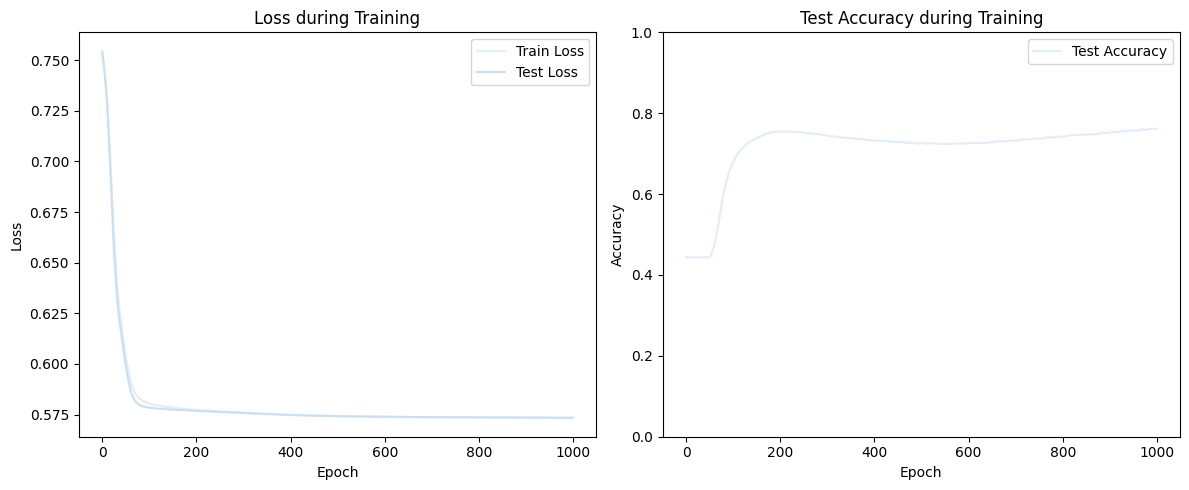

In [30]:
fit_NeuralNetwork(df_train)

# 5. Обучение моделей на данных, в которых выбросы заменены на медианные значения

In [31]:
def replace_outliers_with_median(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']: 
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            median = df[column].median()
            df[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), median)
    
    return df


df_cleaned = replace_outliers_with_median(df_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.2s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.2s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.3s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.3s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipel

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.8s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.7s
Лучшие параметры: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Лучшая точность на валидации: 0.8758354166666666
Точность на тестовой выборке: 0.8750583333333334


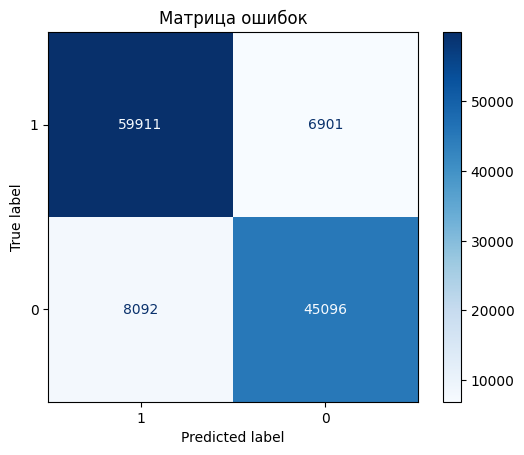

In [32]:
logisticRegression_cleaned_model = fit_logisticRegression(df_cleaned)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  30.7s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  31.1s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  29.5s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  32.6s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  32.3s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  59.3s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  59.9s
[Pipel

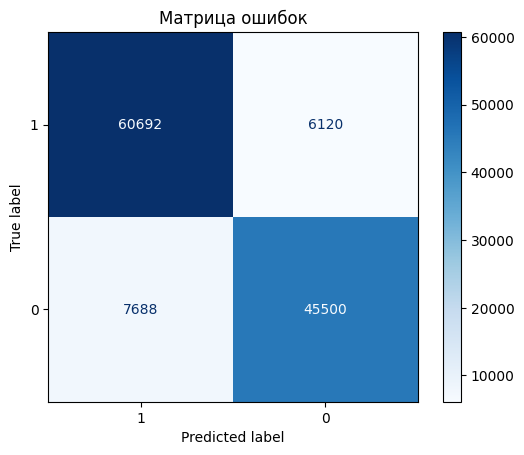

In [33]:
randomForestClassifier_cleaned_model = fit_randomForestClassifier(df_cleaned)

Epoch [10/1000], Loss: 0.7417, Test Loss: 0.7391, Accuracy: 0.4432
Epoch [20/1000], Loss: 0.7059, Test Loss: 0.6980, Accuracy: 0.4432
Epoch [30/1000], Loss: 0.6488, Test Loss: 0.6357, Accuracy: 0.4432
Epoch [40/1000], Loss: 0.6074, Test Loss: 0.5982, Accuracy: 0.4432
Epoch [50/1000], Loss: 0.5924, Test Loss: 0.5878, Accuracy: 0.4432
Epoch [60/1000], Loss: 0.5876, Test Loss: 0.5849, Accuracy: 0.4435
Epoch [70/1000], Loss: 0.5856, Test Loss: 0.5838, Accuracy: 0.4466
Epoch [80/1000], Loss: 0.5847, Test Loss: 0.5832, Accuracy: 0.4523
Epoch [90/1000], Loss: 0.5840, Test Loss: 0.5829, Accuracy: 0.4595
Epoch [100/1000], Loss: 0.5835, Test Loss: 0.5826, Accuracy: 0.4672
Epoch [110/1000], Loss: 0.5833, Test Loss: 0.5824, Accuracy: 0.4753
Epoch [120/1000], Loss: 0.5829, Test Loss: 0.5822, Accuracy: 0.4835
Epoch [130/1000], Loss: 0.5825, Test Loss: 0.5820, Accuracy: 0.4915
Epoch [140/1000], Loss: 0.5824, Test Loss: 0.5818, Accuracy: 0.4990
Epoch [150/1000], Loss: 0.5822, Test Loss: 0.5817, Accura

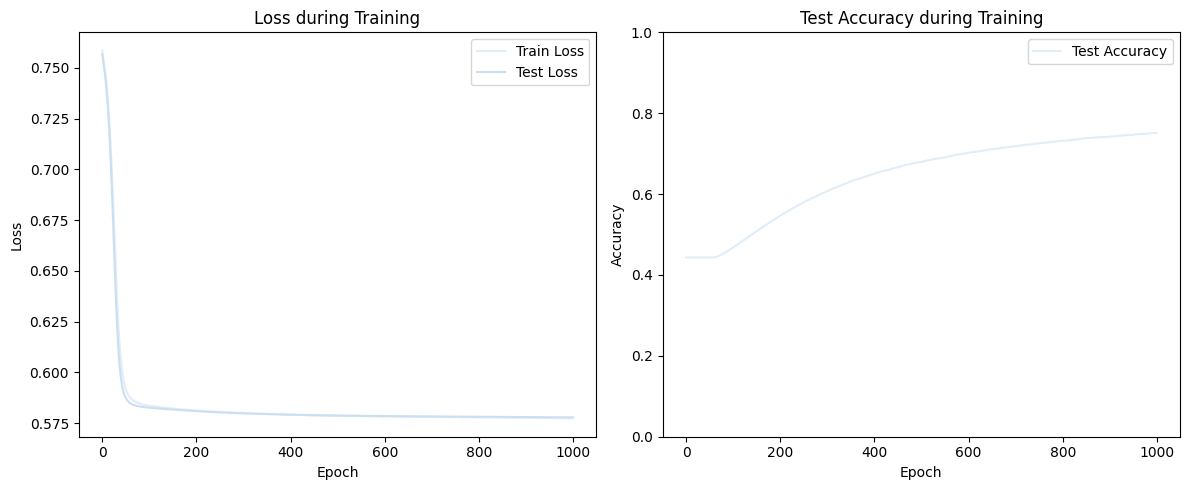

In [34]:
fit_NeuralNetwork(df_cleaned)

# 6. Генерация новых признаков и обучение моделей с ними

In [35]:
# создание новых признаков
df_train['age_group'] = pd.cut(df_train['age'], bins=[0, 30, 50, 100], labels=['young', 'middle-aged', 'old'])
df_train['blood_pressure_to_age'] = df_train['resting_blood_pressure'] / df_train['age']
df_train['cholesterol_level'] = pd.cut(df_train['serum_cholestoral'], bins=[0, 200, 240, 300], labels=['normal', 'high', 'very high'])
df_train['health_risk_index'] = (df_train['resting_blood_pressure'] + df_train['serum_cholestoral']) / df_train['age']


In [36]:
numeric_columns = ['chest','resting_blood_pressure','serum_cholestoral','maximum_heart_rate_achieved','oldpeak','blood_pressure_to_age','health_risk_index']
categorical_columns = ['sex','fasting_blood_sugar','resting_electrocardiographic_results','exercise_induced_angina','slope',
                       'number_of_major_vessels','thal','cholesterol_level','age_group']

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.4s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   1.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.4s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.1s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.3s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipel

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   1.3s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   3.0s
Лучшие параметры: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}
Лучшая точность на валидации: 0.8767833333333334
Точность на тестовой выборке: 0.8757333333333334


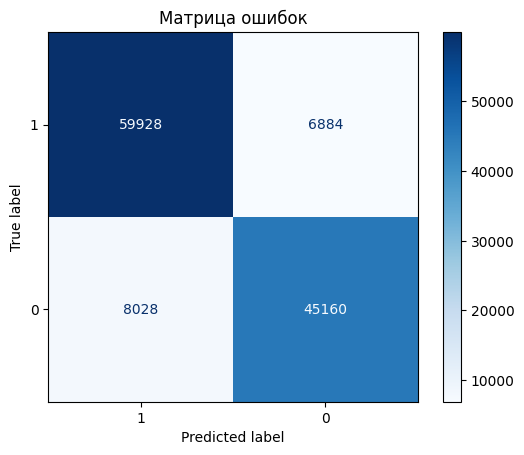

In [37]:
logisticRegression_new_col_model = fit_logisticRegression(df_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  29.1s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  29.9s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  29.6s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  32.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  32.5s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  57.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.9s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  58.7s
[Pipel

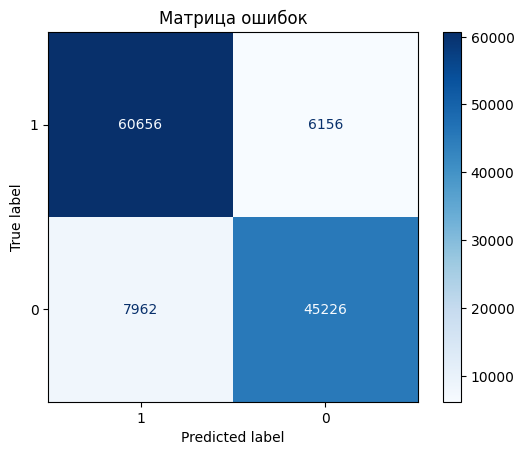

In [38]:
randomForestClassifier_new_col_model = fit_randomForestClassifier(df_train)

Epoch [10/1000], Loss: 0.7421, Test Loss: 0.7403, Accuracy: 0.4432
Epoch [20/1000], Loss: 0.7095, Test Loss: 0.7035, Accuracy: 0.4432
Epoch [30/1000], Loss: 0.6601, Test Loss: 0.6515, Accuracy: 0.4432
Epoch [40/1000], Loss: 0.6243, Test Loss: 0.6164, Accuracy: 0.4432
Epoch [50/1000], Loss: 0.6007, Test Loss: 0.5942, Accuracy: 0.4432
Epoch [60/1000], Loss: 0.5904, Test Loss: 0.5866, Accuracy: 0.4433
Epoch [70/1000], Loss: 0.5868, Test Loss: 0.5843, Accuracy: 0.4462
Epoch [80/1000], Loss: 0.5851, Test Loss: 0.5834, Accuracy: 0.4540
Epoch [90/1000], Loss: 0.5843, Test Loss: 0.5829, Accuracy: 0.4638
Epoch [100/1000], Loss: 0.5838, Test Loss: 0.5826, Accuracy: 0.4734
Epoch [110/1000], Loss: 0.5835, Test Loss: 0.5824, Accuracy: 0.4820
Epoch [120/1000], Loss: 0.5831, Test Loss: 0.5822, Accuracy: 0.4904
Epoch [130/1000], Loss: 0.5828, Test Loss: 0.5820, Accuracy: 0.4990
Epoch [140/1000], Loss: 0.5825, Test Loss: 0.5819, Accuracy: 0.5080
Epoch [150/1000], Loss: 0.5822, Test Loss: 0.5818, Accura

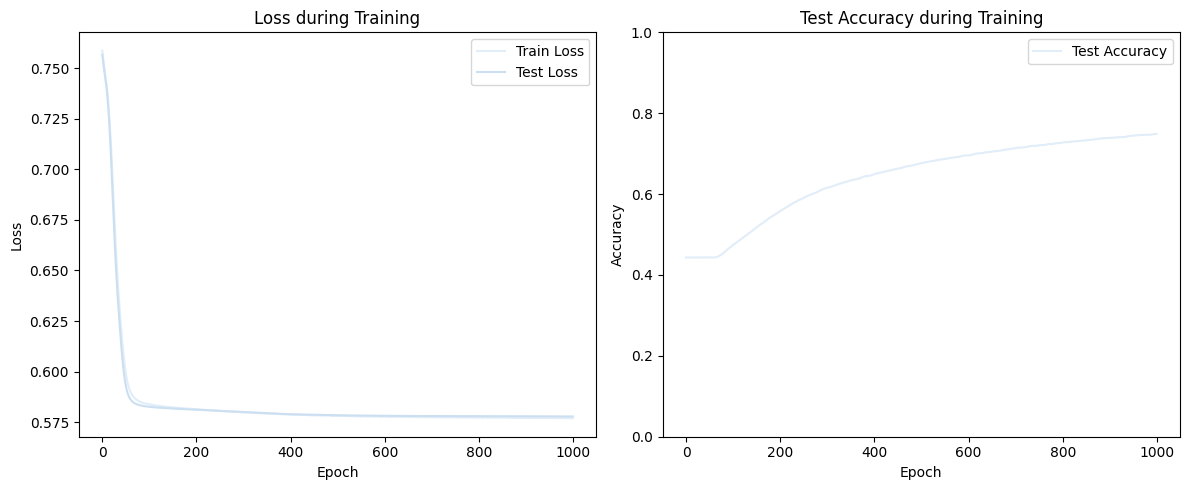

In [39]:
fit_NeuralNetwork(df_train)

# 7. Сравнительный анализ моделей
1. Лучшая модель RandomForest 
2. Нейронная сеть оказалась на последнем месте, возможно из-за того, что взаимосвязи между данными не такие сложные(линейная модель отлично справилась с задачей, почти на уровне RandomForest) 
3. Замена выбросов на медианные значения не помогла улучшить качество моделей
4. Генерации новых признаков, не помогла в повышении качества(возможно необходимо придумать другие)

# 8. Сохранение весов лучшей модели и препроцессора

In [41]:
import joblib
joblib.dump(randomForestClassifier_model, '/kaggle/working/best_random_forest_model.pkl')

['/kaggle/working/best_random_forest_model.pkl']

In [55]:
preprocessor = get_preprocessor(numeric_columns, categorical_columns)
X_train, X_test, y_train, y_test  = get_X_train_y_train(df_train)
preprocessor.fit(X_train)
joblib.dump(preprocessor, 'preprocessor.pkl')

['/kaggle/working/preprocessor.pkl']